**It is produced in the drive environment of Google colab, so you need to modify the file path and so on.**

In [ ]:
%matplotlib inline

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import torch
import librosa
import librosa.display
import torchaudio
import os
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load metadata
metadata = pd.read_csv("/content/drive/MyDrive/UStest/UAV-velocity-prediction-master/information.csv")
metadata.head()

,Unnamed: 0,fname,directory,model,label
0,0,2022-05-14_06-18-26-0.wav,./dataset/big_fast_0719/,X8SW,1
1,1,2022-05-14_06-18-26-1.wav,./dataset/big_fast_0719/,X8SW,1
2,2,2022-05-14_06-18-26-2.wav,./dataset/big_fast_0719/,X8SW,1
3,3,2022-05-14_06-18-26-3.wav,./dataset/big_fast_0719/,X8SW,1
4,4,2022-05-14_06-18-26-4.wav,./dataset/big_fast_0719/,X8SW,1


In [ ]:
class AudioUtil():
    def open(audio_file):
        y, sr = librosa.load(audio_file)
        return y, sr

    # data augmentation function
    def time_shift(aud, shift_limit):
        y, sr = aud
        _, sig_len = y.shape
        shift_amt = int(random.random() * shift_limit * sig_len)
        return y.roll(shift_amt), sr
    
    def MFCCs(y, sr):
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        return mfccs_scaled

In [ ]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root, label):
        # file root
        self.root = root
        # slow = 0, fast = 1
        self.label = label

        fs = [os.path.join(root, f) for f in os.listdir(self.root)]
        # all file path
        self.data_files = [f for f in fs if os.path.isfile(f)]
        self.label = [label] * len(self.data_files)
    
    # __len__
    def __len__(self):
        return len(self.data_files)
    
    def __getitem__(self, idx):
        y, sr = AudioUtil.open(self.data_files[idx])
        mfcc = AudioUtil.MFCCs(y, sr)
        return mfcc, torch.tensor(self.label[idx])

In [ ]:
# file path
big_fast_path = "/content/drive/MyDrive/UStest/UAV-velocity-prediction-master/dataset/big_fast"
big_slow_path = "/content/drive/MyDrive/UStest/UAV-velocity-prediction-master/dataset/big_slow"

In [ ]:
slow_dataset = CustomDataset(big_slow_path, label = 0)
fast_dataset = CustomDataset(big_fast_path, label = 1)

slow_train, slow_valid, slow_test = torch.utils.data.random_split(slow_dataset,
[int(len(slow_dataset)*0.8), int(len(slow_dataset)*0.1), len(slow_dataset) - int(len(slow_dataset) * 0.8) - int(len(slow_dataset) * 0.1)],
generator=torch.Generator().manual_seed(42))

fast_train, fast_valid, fast_test = torch.utils.data.random_split(fast_dataset,
[int(len(fast_dataset)*0.8), int(len(fast_dataset)*0.1), len(fast_dataset) - int(len(fast_dataset) * 0.8) - int(len(fast_dataset) * 0.1)],
generator=torch.Generator().manual_seed(42))

In [ ]:
train_dataset = torch.utils.data.ConcatDataset([slow_train, fast_train])
val_dataset = torch.utils.data.ConcatDataset([slow_valid, fast_valid])
test_dataset = torch.utils.data.ConcatDataset([slow_test, fast_test])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
val_loader = DataLoader(val_dataset, batch_size=16)

In [ ]:
import torch.nn as nn

In [ ]:
import torch
import torch.nn as nn

# Neural Networks example
class ClassifireNN(nn.Module):
    def __init__(self, drop_out=0.0):
        super(ClassifireNN, self).__init__()
        self.fc1 = nn.Linear(20, 32)
        self.fc2 = nn.Linear(32, 8)
        self.fc3 = nn.Linear(8, 4)
        self.fc4 = nn.Linear(4, 1)

        
        self.relu = nn.ReLU()

        self.drop_out = nn.Dropout(p=drop_out)

    def forward(self, x):
        # x = x.view(-1, 20)  

        x = self.relu(self.fc1(x))
        x = self.drop_out(x)
        x = self.relu(self.fc2(x))
        x = self.drop_out(x)
        x = self.relu(self.fc3(x))
        x = self.drop_out(x)
        x = self.relu(self.fc4(x))

        x = self.drop_out(x)
        x = self.fc6(x)

        x = torch.sigmoid(x)

        return x.view(-1)

# CNN example
class ClassifireCNN(nn.Module):
    def __init__(self, drop_out=0.0):
        super(ClassifireCNN, self).__init__()
        self.cnn1 = nn.Conv1d(in_channels=20, out_channels=32, kernel_size=5, padding=2)
        self.cnn2 = nn.Conv1d(in_channels=32, out_channels=8, kernel_size=5, padding=2)
        self.cnn3 = nn.Conv1d(in_channels=8, out_channels= 1, kernel_size=5, padding=2)


        # self.pool1 = nn.MaxPool1d(3)
        # self.pool1 = nn.MaxPool1d(4)
        # self.pool1 = nn.MaxPool1d(5)

        # self.fc1 = nn.Linear(4 * 128, 512)
        # self.fc2 = nn.Linear(512, 128)
        # self.fc3 = nn.Linear(128, 64)
        # self.fc4 = nn.Linear(64, 32)
        # self.fc5 = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()

        self.drop_out = nn.Dropout(p=drop_out)

    def forward(self, x):
        # input : [16, 20], [batch, feature]
        x = torch.reshape(x, (-1, 20, 1))   #[batch, feature, 1]
        x = self.relu(self.cnn1(x))         # [batch, 8, 1]
        x = self.relu(self.cnn2(x))         # [batch, 4, 1]
        x = self.cnn3(x)                   # [batch, 1, 1]   

        x = torch.sigmoid(x)

        return x.view(-1)


In [ ]:
device = torch.device(f'cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
LR = 0.045
PATIENCE = 3
FACTOR = 0.95
DROP_OUT = 0.3
EPOCHS = 100

In [ ]:
model = ClassifireCNN(drop_out=DROP_OUT).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
criterion = nn.BCELoss()

In [ ]:
best_auc = 0
best_epoch = -1
best_pred = []

prev_model = None

In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from torch.utils.tensorboard import SummaryWriter

In [ ]:
val_losses = []
train_losses = []
val_accuracy = []
train_accuracy = []

In [ ]:
for i in tqdm(range(EPOCHS)):

    # Train
    loss_sum = 0
    train_loss_sum = 0
    val_loss_sum = 0
    true_labels = []
    pred_labels = []
    t_true_labels = []
    t_pred_labels = []
    v_true_labels = []
    v_pred_labels = []
    model.train()
    if i == 0:
        lr = LR
    elif i % 2 == 0 and i != 0:
        lr *= 0.94
        optimizer = torch.optim.Adam(model.parameters(), lr=LR)
        
    for e_num, (x, y) in enumerate(train_loader):

        x, y = x.type(torch.FloatTensor).to(device), y.type(torch.FloatTensor).to(device)
        
        model.zero_grad()
        pred_y = model(x)

        tloss = criterion(pred_y, y)
        train_loss_sum += tloss.detach()
        
        optimizer.zero_grad()
        tloss.backward()
        optimizer.step()

        true_labels.extend(y.cpu().numpy())
        pred_labels.extend(np.around(pred_y.cpu().detach().numpy()))
        t_true_labels.extend(y.cpu().numpy())
        t_pred_labels.extend(np.around(pred_y.cpu().detach().numpy()))

    train_auc = accuracy_score(t_true_labels, t_pred_labels)
    train_accuracy.append(train_auc.item())
    auc = accuracy_score(true_labels, pred_labels)
    train_losses.append(train_loss_sum.item())

    loss_sum = train_loss_sum
    loss = tloss
    # Valid
    for e_num, (x, y) in enumerate(val_loader):
        x, y = x.type(torch.FloatTensor).to(device), y.type(torch.FloatTensor).to(device)

        pred_y = model(x)
        vloss = criterion(pred_y, y)
        loss = vloss

        val_loss_sum += vloss.detach()
        
        loss_sum += loss.detach()
        true_labels.extend(y.cpu().numpy())
        pred_labels.extend(np.around(pred_y.cpu().detach().numpy()))
        v_true_labels.extend(y.cpu().numpy())
        v_pred_labels.extend(np.around(pred_y.cpu().detach().numpy()))
        
        
    val_auc = accuracy_score(v_true_labels, v_pred_labels)
    val_accuracy.append(val_auc.item())
    auc = accuracy_score(true_labels, pred_labels)
    val_losses.append(val_loss_sum.item())

    
    
    # wirter.add_scalar("")

    if auc > best_auc:
        best_pred = pred_labels
        best_auc = auc
        best_epoch = i

        if prev_model is not None:
            os.remove(prev_model)
        prev_model = f'cnn_model_{best_auc}.h5'
        torch.save(model.state_dict(), prev_model)

    if i % 5 == 4:
      print(f"best validation acc = {best_auc}, in epoch {best_epoch}")
      print("loss = ", loss_sum)
      print("train_loss = ", train_loss_sum, "val_loss", val_loss_sum)
      print("auc = ", auc)
      print("train_auc = ", train_auc, "val_auc = ", val_auc)

print(f"best validation acc = {best_auc}, in epoch {best_epoch}")


  5%|▌         | 5/100 [06:05<1:53:01, 71.39s/it]

best validation acc = 0.9863142991977348, in epoch 3
loss =  tensor(8.4050, device='cuda:0')
train_loss =  tensor(8.4050, device='cuda:0') val_loss tensor(1.1804, device='cuda:0')
auc =  0.9858423784804153
train_auc =  0.986737400530504 val_auc =  0.9786324786324786


 10%|█         | 10/100 [11:54<1:45:14, 70.17s/it]

best validation acc = 0.9924492685228882, in epoch 7
loss =  tensor(13.7777, device='cuda:0')
train_loss =  tensor(13.7777, device='cuda:0') val_loss tensor(0.1552, device='cuda:0')
auc =  0.9806512505899009
train_auc =  0.9782493368700266 val_auc =  1.0


 15%|█▌        | 15/100 [17:43<1:38:53, 69.81s/it]

best validation acc = 0.9924492685228882, in epoch 7
loss =  tensor(13.5995, device='cuda:0')
train_loss =  tensor(13.5995, device='cuda:0') val_loss tensor(2.6407, device='cuda:0')
auc =  0.9839546956111374
train_auc =  0.986737400530504 val_auc =  0.9615384615384616


 20%|██        | 20/100 [23:31<1:32:45, 69.57s/it]

best validation acc = 0.9924492685228882, in epoch 7
loss =  tensor(10.8183, device='cuda:0')
train_loss =  tensor(10.8183, device='cuda:0') val_loss tensor(0.8605, device='cuda:0')
auc =  0.9877300613496932
train_auc =  0.9872679045092838 val_auc =  0.9914529914529915


 25%|██▌       | 25/100 [29:18<1:26:43, 69.38s/it]

best validation acc = 0.9924492685228882, in epoch 7
loss =  tensor(10.4903, device='cuda:0')
train_loss =  tensor(10.4903, device='cuda:0') val_loss tensor(1.6472, device='cuda:0')
auc =  0.9877300613496932
train_auc =  0.9888594164456234 val_auc =  0.9786324786324786


 30%|███       | 30/100 [35:05<1:21:00, 69.44s/it]

best validation acc = 0.9924492685228882, in epoch 7
loss =  tensor(6.0432, device='cuda:0')
train_loss =  tensor(6.0432, device='cuda:0') val_loss tensor(0.5468, device='cuda:0')
auc =  0.9910335063709297
train_auc =  0.9909814323607427 val_auc =  0.9914529914529915


 35%|███▌      | 35/100 [40:53<1:15:25, 69.62s/it]

best validation acc = 0.9924492685228882, in epoch 7
loss =  tensor(23.9352, device='cuda:0')
train_loss =  tensor(23.9352, device='cuda:0') val_loss tensor(6.3388, device='cuda:0')
auc =  0.9915054270882492
train_auc =  0.9909814323607427 val_auc =  0.9957264957264957


 40%|████      | 40/100 [46:41<1:09:31, 69.52s/it]

best validation acc = 0.9924492685228882, in epoch 7
loss =  tensor(20.6179, device='cuda:0')
train_loss =  tensor(20.6179, device='cuda:0') val_loss tensor(8.0255, device='cuda:0')
auc =  0.976875884851345
train_auc =  0.9761273209549072 val_auc =  0.9829059829059829


 45%|████▌     | 45/100 [52:34<1:05:20, 71.28s/it]

best validation acc = 0.9924492685228882, in epoch 7
loss =  tensor(55.6436, device='cuda:0')
train_loss =  tensor(55.6436, device='cuda:0') val_loss tensor(2.2001, device='cuda:0')
auc =  0.9646059462010382
train_auc =  0.9649867374005305 val_auc =  0.9615384615384616


 50%|█████     | 50/100 [58:25<58:28, 70.18s/it]

best validation acc = 0.9952807928268051, in epoch 47
loss =  tensor(50.6948, device='cuda:0')
train_loss =  tensor(50.6948, device='cuda:0') val_loss tensor(1.4485, device='cuda:0')
auc =  0.9801793298725814
train_auc =  0.9803713527851459 val_auc =  0.9786324786324786


 55%|█████▌    | 55/100 [1:04:11<52:03, 69.40s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(22.0583, device='cuda:0')
train_loss =  tensor(22.0583, device='cuda:0') val_loss tensor(1.6222, device='cuda:0')
auc =  0.9966965549787635
train_auc =  0.996816976127321 val_auc =  0.9957264957264957


 60%|██████    | 60/100 [1:09:55<45:50, 68.75s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.7845, device='cuda:0')
train_loss =  tensor(4.7845, device='cuda:0') val_loss tensor(0.3837, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957


 65%|██████▌   | 65/100 [1:15:35<39:39, 67.98s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.8040, device='cuda:0')
train_loss =  tensor(4.8040, device='cuda:0') val_loss tensor(0.3762, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957


 70%|███████   | 70/100 [1:21:14<33:59, 67.98s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.7914, device='cuda:0')
train_loss =  tensor(4.7914, device='cuda:0') val_loss tensor(0.3798, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957


 75%|███████▌  | 75/100 [1:26:51<28:06, 67.45s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.8487, device='cuda:0')
train_loss =  tensor(4.8487, device='cuda:0') val_loss tensor(0.3780, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957


 80%|████████  | 80/100 [1:32:29<22:29, 67.47s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.7841, device='cuda:0')
train_loss =  tensor(4.7841, device='cuda:0') val_loss tensor(0.3803, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957


 85%|████████▌ | 85/100 [1:38:06<16:52, 67.52s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.8083, device='cuda:0')
train_loss =  tensor(4.8083, device='cuda:0') val_loss tensor(0.3774, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957


 90%|█████████ | 90/100 [1:43:43<11:15, 67.55s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.8230, device='cuda:0')
train_loss =  tensor(4.8230, device='cuda:0') val_loss tensor(0.3727, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957


 95%|█████████▌| 95/100 [1:49:20<05:37, 67.41s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.7854, device='cuda:0')
train_loss =  tensor(4.7854, device='cuda:0') val_loss tensor(0.3803, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957


100%|██████████| 100/100 [1:54:57<00:00, 68.98s/it]

best validation acc = 0.9966965549787635, in epoch 54
loss =  tensor(4.7821, device='cuda:0')
train_loss =  tensor(4.7821, device='cuda:0') val_loss tensor(0.3772, device='cuda:0')
auc =  0.9933931099575272
train_auc =  0.993103448275862 val_auc =  0.9957264957264957
best validation acc = 0.9966965549787635, in epoch 54


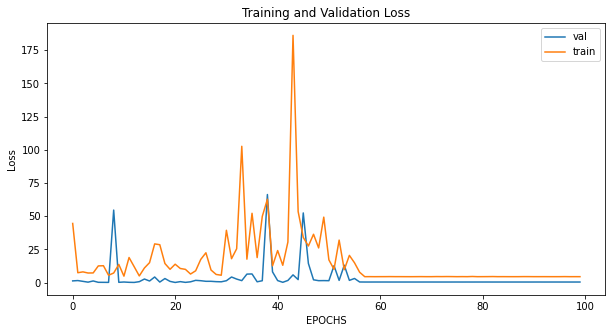

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()

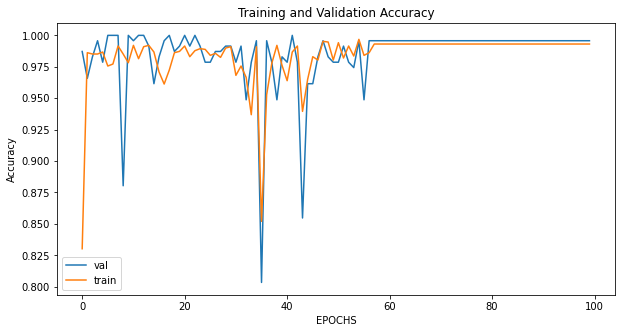

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy")
plt.plot(val_accuracy,label="val")
plt.plot(train_accuracy,label="train")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
